### Principal Component Analysis:
Imagine we have information about different kinds of fruits, like their color, size, how sweet they are, how juicy, and maybe even how bumpy their skin is. Let's say we have 20 different things you measure for each fruit. Now, if you want to compare the fruits and see which ones are most similar, looking at all 20 things at once can get really confusing.

PCA is like finding a special way to look at the fruits so that instead of 20 different measurements, you might only need to look at 2 or 3 main "ingredients" that tell you most of what's important about how the fruits are different.

Maybe the "sweetness" and the "size" are the most important things that make different fruits stand out. A big, sweet fruit is very different from a small, non sweet one. PCA helps us find these important "ingredients" (which we call principal components) by figuring out which combinations of the original measurements show the biggest differences between the fruits.

#### implementation (files not included in github repo due to size constraints)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Loading class labels (1 = ER+ , 0 = ER-)
class_labels = pd.read_csv('class.tsv', sep='\t', header=None)
labels = class_labels[0].values

In [6]:
# Loading gene name mapping
with open('columns.tsv', 'r') as f:
    # gene_mapping = pd.read_csv(f, sep='\t', header=None, engine='python')
    lines = [line for line in f if not line.startswith('#')]

from io import StringIO
filtered_content = StringIO(''.join(lines))
gene_mapping = pd.read_csv(filtered_content, sep='\t')

In [7]:
# Loading gene expression data
with open('filtered.tsv', 'r') as f:
    expression_data = pd.read_csv(f, sep='\t')

expression_data.columns = expression_data.columns.astype(str)
expression_data.columns = expression_data.columns.str.strip()   #columns were having whitespaces, that was causing problem
print(expression_data.columns)
# print('4404' in expression_data.columns)  # Should return True
# for column_name in expression_data.columns:
#     if '4404' == str(column_name).strip():
#         print("HERE")
#         break
# # Find gene IDs
xbp1_id = 4404  # Given in the problem
gata3_id = gene_mapping[gene_mapping['GeneSymbol'] == 'GATA3']['ID'].values[0]

print(gata3_id)

print('4404' in expression_data.columns)
xbp1_expression = expression_data[str(xbp1_id)].values
gata3_expression = expression_data[str(gata3_id)].values

# Color map
colors = ['blue' if label == 0 else 'green' for label in labels]

Index(['1', '2', '6', '12', '13', '15', '16', '17', '20', '25',
       ...
       '27622', '27623', '27633', '27634', '27638', '27641', '27642', '27643',
       '27644', '27648'],
      dtype='object', length=16174)
4359
True


In [8]:
# PCA IMPLEMENTATION
def perform_pca(X):
    # preprocessing for calculating the covariance matrix
    x_centered = x - np.mean(x, axis = 0)
    cov_matrix = np.cov(x_centered, rowvar=False)
    # Now we have to calculate the eigenvalues and eigenvectors of the covariance matrix calculated above
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # As described above, we select the top k eigenvectors (arranged in highest-> lowest eigenvalues order)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvectors, eigenvalues, x_centered

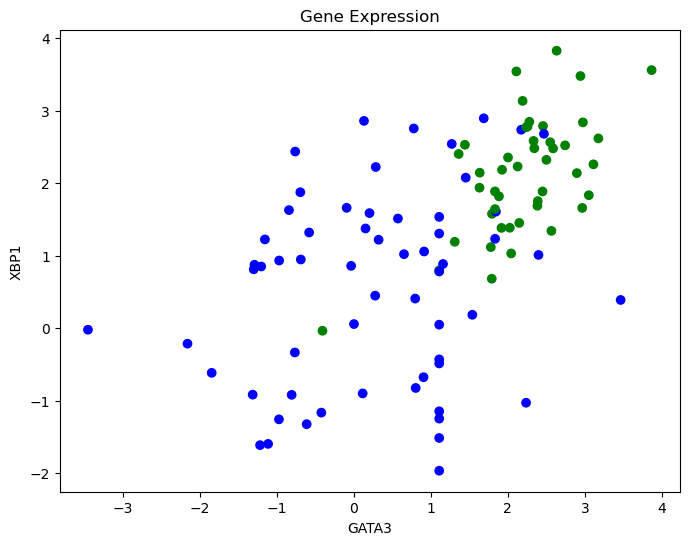

In [9]:
# Figure - 1(a) Scatter plot of xbp1 vs gata3

plt.figure(figsize=(8, 6))
plt.scatter(gata3_expression, xbp1_expression, c=colors)
plt.xlabel('GATA3')
plt.ylabel('XBP1')
plt.title('Gene Expression')
# plt.savefig('figure_1a.png')
plt.show()

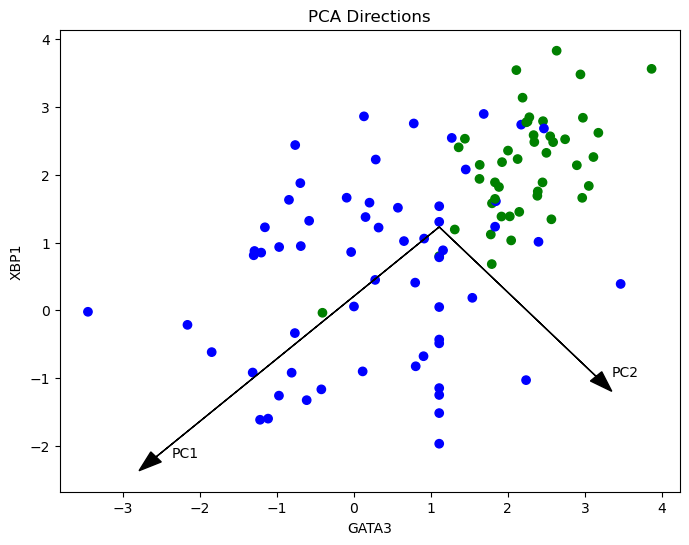

In [10]:
# Figure 1(b)
x = np.column_stack((gata3_expression, xbp1_expression))

eigenvectors, eigenvalues, x_centered = perform_pca(x)
# as can be seen from plot, two principal components are selected
pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]

# projections on the principal components - just the matrix multiplication of principal component vector and the original matrix (not the covariance one)
projection_pc1 = np.dot(x_centered, pc1)
projection_pc2 = np.dot(x_centered, pc2)

plt.figure(figsize=(8, 6))
plt.scatter(gata3_expression, xbp1_expression, c=colors)

# Plotting the principal components directions
mean_gata3 = np.mean(gata3_expression)
mean_xbp1 = np.mean(xbp1_expression)
plt.arrow(mean_gata3, mean_xbp1, pc1[0]*5, pc1[1]*5, head_width=0.2, head_length=0.3, fc='black', ec='black')
plt.arrow(mean_gata3, mean_xbp1, pc2[0] * 3, pc2[1] * 3, head_width=0.2, head_length=0.3, fc='black', ec='black')

plt.text(mean_gata3 + pc1[0] * 5 + 0.2, mean_xbp1 + pc1[1] * 5, 'PC1')
plt.text(mean_gata3 + pc2[0] * 3 + 0.2, mean_xbp1 + pc2[1] * 3, 'PC2')

plt.xlabel('GATA3')
plt.ylabel('XBP1')
plt.title('PCA Directions')
# plt.savefig('figure_1b.png')
plt.show()

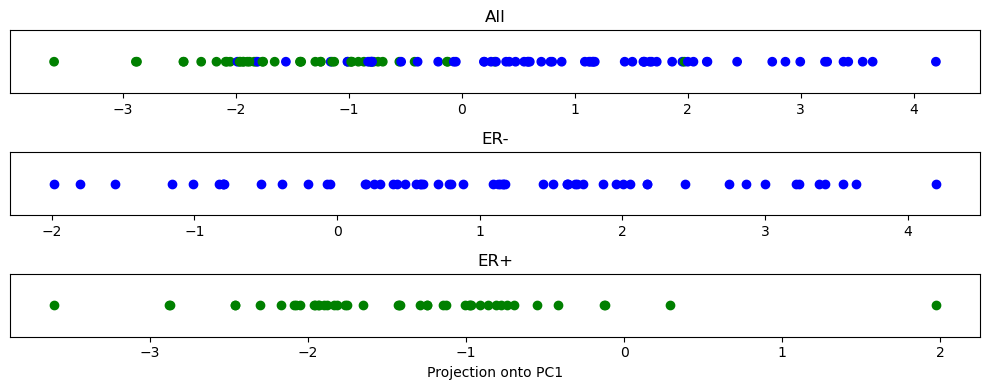

Variance explained by PC1: 0.7792
Variance explained by PC2: 0.2208


In [12]:
# Figure-(c) Projection on PC1

# Separate ER+ and ER- samples
er_pos_pc1 = projection_pc1[labels == 1]
er_neg_pc1 = projection_pc1[labels == 0]

# Create Figure 1c
plt.figure(figsize=(10, 4))

# All samples
plt.subplot(3, 1, 1)
plt.scatter(projection_pc1, np.zeros_like(projection_pc1), c=colors)
plt.yticks([])
plt.title('All')

# ER- samples
plt.subplot(3, 1, 2)
plt.scatter(er_neg_pc1, np.zeros_like(er_neg_pc1), c='blue')
plt.yticks([])
plt.title('ER-')

# ER+ samples
plt.subplot(3, 1, 3)
plt.scatter(er_pos_pc1, np.zeros_like(er_pos_pc1), c='green')
plt.yticks([])
plt.title('ER+')
plt.xlabel('Projection onto PC1')

plt.tight_layout()
# plt.savefig('figure_1c.png')
plt.show()

# Calculate and print variance explained
print(f"Variance explained by PC1: {eigenvalues[0]/sum(eigenvalues):.4f}")
print(f"Variance explained by PC2: {eigenvalues[1]/sum(eigenvalues):.4f}")


### Benfit of PCA

PCA like a detective for patterns. Even if we don't have labels like "ER+" or "ER-", PCA looks at all the measurements of the breast cancer samples and finds the underlying ways they naturally group together based on their characteristics. 

PCA can show us that the ER+ samples tend to cluster together and are distinct from the ER- samples, all without us telling it anything about these "ER" categories. 

It's like the data itself is whispering its secrets through these natural groupings that PCA uncovers.